<a href="https://colab.research.google.com/github/jeongsukko/jejumaster-1/blob/main/%EA%B3%BC%EC%A0%9C1_%EA%B3%A0%EC%A0%95%EC%88%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



In [5]:
PATH = './sample_data/'
FILE = '제주도_전출입인구수.csv'

----------------------------------

### 3-1.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [46]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 0.[사전준비] 라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [1]:
import pandas  as pd
import numpy as np
import matplotlib as plt
pd.__version__
np.__version__
plt.__version__

'3.7.1'

### 1.데이터 다운로드하기

In [2]:
PATH = './sample_data/'
FILE = '제주도_전출입인구수.csv'

### 2.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [3]:
import pandas as pd

file = PATH+FILE
df = pd.read_csv(file, encoding = 'cp949') #cp949: 윈도우OS 기본 인코딩 포맷
df.head(3)

,연도분기,총전입,총전출,시도간전입,시도간전출
0,2019.1/4,30724.0,29971.0,11001.0,10248.0
1,2019.2/4,21112.0,19722.0,8173.0,6783.0
2,2019.3/4,20287.0,19657.0,8203.0,7573.0


---

### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

#### @컬럼이름 출력하기

In [4]:
# 현재 컬럼이름 출력하기
df.iloc[:, [0]]

,연도분기
0,2019.1/4
1,2019.2/4
2,2019.3/4
3,2019.4/4
4,2020.1/4
5,2020.2/4
6,2020.3/4
7,2020.4/4
8,2021.1/4
9,2021.2/4


---------------------

In [5]:
df.dtypes

연도분기       object
총전입       float64
총전출       float64
시도간전입     float64
시도간전출     float64
dtype: object

---------------------------

In [6]:
df['총전입'] = df['총전입'].apply('int64')
df['총전출'] = df['총전출'].apply('int64')
df['시도간전입'] = df['시도간전입'].apply('int64')
df.dtypes

연도분기       object
총전입         int64
총전출         int64
시도간전입       int64
시도간전출     float64
dtype: object

### 4.데이터 시각화하기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @데이터를 표로 시각화하기

In [7]:
df.iloc[:, [0]]
df.columns
df.drop([19], axis=0, inplace=True)
df

,연도분기,총전입,총전출,시도간전입,시도간전출
0,2019.1/4,30724,29971,11001,10248.0
1,2019.2/4,21112,19722,8173,6783.0
2,2019.3/4,20287,19657,8203,7573.0
3,2019.4/4,22843,22680,7781,7618.0
4,2020.1/4,29470,30038,10767,11335.0
5,2020.2/4,23580,22875,8390,7685.0
6,2020.3/4,21572,20103,8722,7253.0
7,2020.4/4,23492,21720,8837,7065.0
8,2021.1/4,29717,29022,11062,10367.0
9,2021.2/4,21337,19966,8292,6921.0


#### @선 그래프로 시각화하기

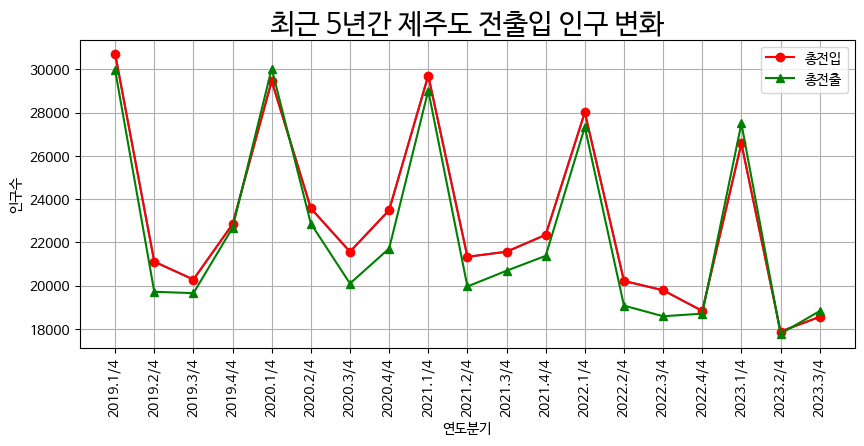

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

x = df['연도분기']
y1 = df['총전입']
y2 = df['총전출']

plt.plot(x, y1)
plt.plot(y1, 'o', linestyle='solid', c='r', label='총전입')
plt.plot(y2, '^', linestyle='solid', c='g', label='총전출')

plt.xticks(rotation=90)
plt.title('최근 5년간 제주도 전출입 인구 변화', fontsize=20)
plt.xlabel('연도분기'); plt.ylabel('인구수');
plt.legend(); plt.grid();
plt.show()



---



THE END